## Importing neccessary libraries

Pickle library is imported to load  pre trained machine learning models which are saved in pickle file format. Pandas library is used to read and manipulate data sets as data frame objects. Numpy library which is normally used for numerical analysis is used here to create an array that contains input for predict method of various machine learning models. 

In [1]:
!conda activate surya

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

The observational dataset is imported from the csv file and saved as a pandas data frame in variable grd.

In [3]:
gr_data = pd.read_csv("../data/graphene_data_final.csv")

The 1st four columns Graphene_percentage, feed, RPM and DOC were taken as input and MRR as 2st output and `Ra` as 2nd output.

In [4]:
X = gr_data[['Graphene_percentage', 'FEED', 'RPM', 'DOC']]
Y = gr_data['MRR_gm_per_sec']
Y2 = gr_data['Ra']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=39)
X_train2, X_test2, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=23)

In [6]:
train_ = X_train.shape[0]
test_ = X_test.shape[0]
train_2 = X_train2.shape[0]
test_2 = X_test2.shape[0]

## Loading previously saved models

The machine learning models which were created using scikit learn were saved as pickle files and tensorflow models were saved as h5 files. Now those saved models are being loaded from the model files.

In [7]:
with open('../trained_models/decision_tree_RA.pkl', 'rb') as p:
    dtr_ra = pickle.load(p)

In [8]:
with open('../trained_models/decision_tree_MRR.pkl', 'rb') as p:
    dtr_mrr = pickle.load(p)

In [9]:
with open('../trained_models/random_forest_MRR.pkl', 'rb') as p:
    rfr_mrr = pickle.load(p)

In [10]:
with open('../trained_models/random_forest_RA.pkl', 'rb') as p:
    rfr_ra = pickle.load(p)

In [11]:
with open('../trained_models/gradient_boosting_MRR.pkl', 'rb') as p:
    gbr_mrr = pickle.load(p)

In [12]:
with open('../trained_models/gradient_boosting_RA.pkl', 'rb') as p:
    gbr_ra = pickle.load(p)

In [13]:
with open('../trained_models/ANN_RA_sklearn.pkl', 'rb') as p:
    ann_sk_ra = pickle.load(p)

In [14]:
with open('../trained_models/ANN_MRR_sklearn.pkl', 'rb') as p:
    ann_sk_mrr = pickle.load(p)

### Material Removal Rate prediction using known data

In this section the feature values are not taken directly from the user rather the prompt asks for the serial number of observation from the original dataset. Then through slicing of dataframe using the entered serial number the program gets the corresponding input values. After getting the 4 input values it feeds them to the loaded models and displays the predicted output.

In [15]:
a_ = int(input("Enter the serial number of observation(1 to 135): "))
b_ = a_ + 1

KeyboardInterrupt: Interrupted by user

In [ ]:
print("Prediction of MRR by random forest is "+str(rfr_mrr.predict(X[a_:b_].to_numpy())[0]))
print("Prediction of MRR by decision tree is "+str(dtr_mrr.predict(X[a_:b_].to_numpy())[0]))
print("Prediction of MRR by gradient boosting is "+str(gbr_mrr.predict(X[a_:b_].to_numpy())[0]))
print("Prediction of MRR by ann is "+str(ann_sk_mrr.predict(X[a_:b_].to_numpy())[0]))
print("Real value of MRR is "+str(Y[a_:b_].to_numpy()[0]))

### Surface Roughness prediction using known data

In [ ]:
rfr_ra_op = rfr_ra.predict(X[a_:b_].to_numpy())[0]
dtr_ra_op = dtr_ra.predict(X[a_:b_].to_numpy())[0]
gbr_ra_op = gbr_ra.predict(X[a_:b_].to_numpy())[0]
ann_ra_op = ann_sk_ra.predict(X[a_:b_].to_numpy())[0]
real_ra_op = Y2[a_:b_].to_numpy()[0]

In [ ]:
print("Prediction of RA by random forest is "+str(rfr_ra_op))
print("Prediction of RA by decision tree is "+str(dtr_ra_op))
print("Prediction of RA by gradient boosting is "+str(gbr_ra_op))
print("Prediction of RA by ann is "+str(ann_ra_op))
print("Real value of RA is "+str(real_ra_op))

## Material Removal Rate predictor model perfomance graph

#### On Train data

Using all data points

In [16]:
#y_axis_mrr = [rfr_mrr_op,dtr_mrr_op,gbr_mrr_op,ann_mrr_op,real_mrr_op]
a_ = 1
b_ = train_
b_ = b_+1
rfr_mrr_op = list(rfr_mrr.predict(X_train.to_numpy()))
dtr_mrr_op = list(dtr_mrr.predict(X_train.to_numpy()))
gbr_mrr_op = list(gbr_mrr.predict(X_train.to_numpy()))
ann_mrr_op = list(ann_sk_mrr.predict(X_train.to_numpy()))
real_mrr_op = list(Y_train.to_numpy())
x_mrr = list(np.arange(1,train_+1))

c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


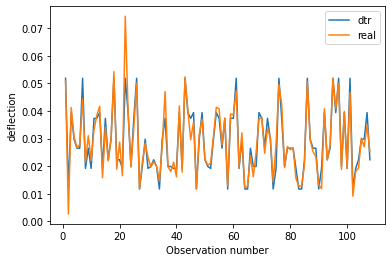

In [17]:
fig2, ax2 = plt.subplots()
ax2.plot(x_mrr,dtr_mrr_op,label = "dtr")
ax2.plot(x_mrr,real_mrr_op,label= "real")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

Traindata MRR All DTR points

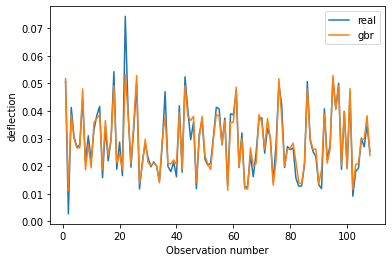

In [18]:
fig3, ax3 = plt.subplots()
ax3.plot(x_mrr,real_mrr_op,label= "real")
ax3.plot(x_mrr,gbr_mrr_op,label = "gbr")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

Traindata MRR All GBR points

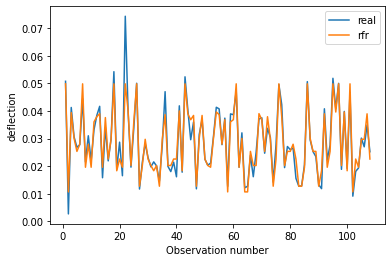

In [19]:
fig4, ax4 = plt.subplots()
ax4.plot(x_mrr,real_mrr_op,label= "real")
ax4.plot(x_mrr,rfr_mrr_op,label = "rfr")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

Traindata MRR All RFR points

#### On Test data

In [20]:
rfr_mrr_op = list(rfr_mrr.predict(X_test.to_numpy()))
dtr_mrr_op = list(dtr_mrr.predict(X_test.to_numpy()))
gbr_mrr_op = list(gbr_mrr.predict(X_test.to_numpy()))
ann_mrr_op = list(ann_sk_mrr.predict(X_test.to_numpy()))
real_mrr_op = list(Y_test.to_numpy())
x_mrr = list(np.arange(1,test_+1))

c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


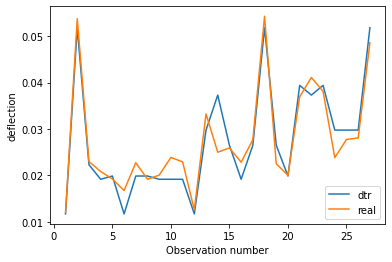

In [21]:
fig2, ax2 = plt.subplots()
ax2.plot(x_mrr,dtr_mrr_op,label = "dtr")
ax2.plot(x_mrr,real_mrr_op,label= "real")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

Testdata MRR DTR

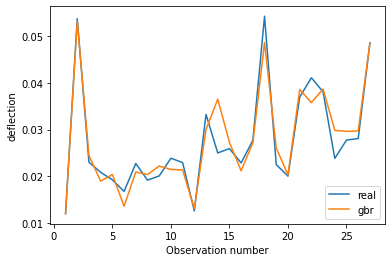

In [22]:
fig3, ax3 = plt.subplots()
ax3.plot(x_mrr,real_mrr_op,label= "real")
ax3.plot(x_mrr,gbr_mrr_op,label = "gbr")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

Testdata MRR GBR

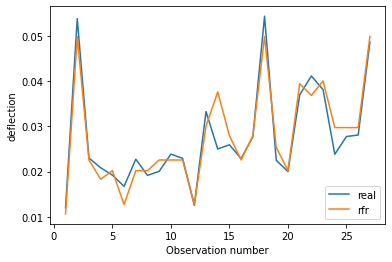

In [23]:
fig4, ax4 = plt.subplots()
ax4.plot(x_mrr,real_mrr_op,label= "real")
ax4.plot(x_mrr,rfr_mrr_op,label = "rfr")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

Testdata MRR RFR

### Surface Roughness Prediction Peformance Graph

#### On Train data

In [24]:
a_ = 1
b_ = train_
b_ = b_+1
rfr_ra_op = list(rfr_ra.predict(X_train2.to_numpy()))
dtr_ra_op = list(dtr_ra.predict(X_train2.to_numpy()))
gbr_ra_op = list(gbr_ra.predict(X_train2.to_numpy()))
ann_ra_op = list(ann_sk_ra.predict(X_train2.to_numpy()))
real_ra_op = list(Y2_train.to_numpy())
x_ra = list(np.arange(1,train_+1))

c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


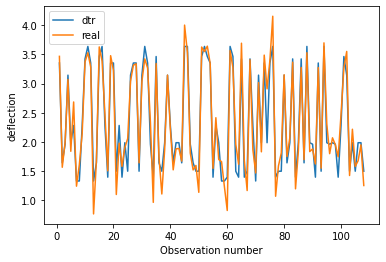

In [25]:
fig2, ax2 = plt.subplots()
ax2.plot(x_ra,dtr_ra_op,label = "dtr")
ax2.plot(x_ra,real_ra_op,label= "real")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

Traindata ra All DTR points

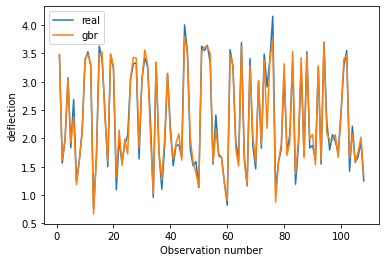

In [26]:
fig3, ax3 = plt.subplots()
ax3.plot(x_ra,real_ra_op,label= "real")
ax3.plot(x_ra,gbr_ra_op,label = "gbr")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

Traindata ra All GBR points

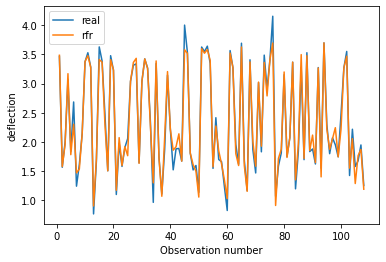

In [27]:
fig4, ax4 = plt.subplots()
ax4.plot(x_ra,real_ra_op,label= "real")
ax4.plot(x_ra,rfr_ra_op,label = "rfr")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

Traindata ra All RFR points

#### On Test data

In [28]:
rfr_ra_op = list(rfr_ra.predict(X_test2.to_numpy()))
dtr_ra_op = list(dtr_ra.predict(X_test2.to_numpy()))
gbr_ra_op = list(gbr_ra.predict(X_test2.to_numpy()))
ann_ra_op = list(ann_sk_ra.predict(X_test2.to_numpy()))
real_ra_op = list(Y2_test.to_numpy())
x_ra = list(np.arange(1,test_+1))

c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


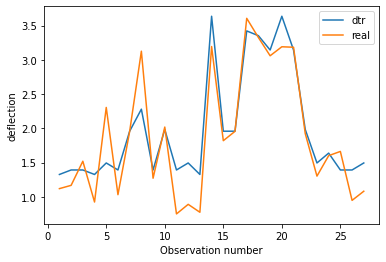

In [29]:
fig2, ax2 = plt.subplots()
ax2.plot(x_ra,dtr_ra_op,label = "dtr")
ax2.plot(x_ra,real_ra_op,label= "real")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

Testdata RA DTR

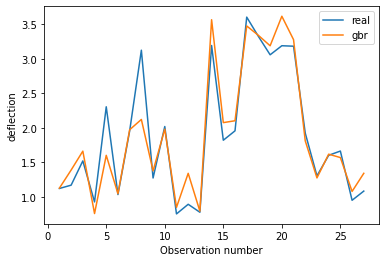

In [30]:
fig3, ax3 = plt.subplots()
ax3.plot(x_ra,real_ra_op,label= "real")
ax3.plot(x_ra,gbr_ra_op,label = "gbr")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

Testdata RA GBR

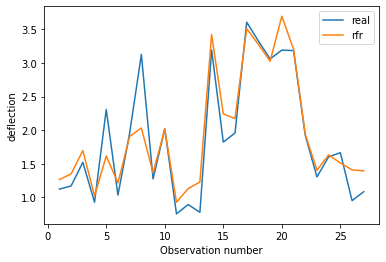

In [31]:
fig4, ax4 = plt.subplots()
ax4.plot(x_ra,real_ra_op,label= "real")
ax4.plot(x_ra,rfr_ra_op,label = "rfr")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

Testdata RA RFR